# Midterm Exam (part 2) - Computational Physics I

### Deadline: Tuesday 8 April 2024 (by 19h00)
### Name: Alan Palma Travez

## Part 2. (20 points) Two-Body Problem: Black Hole Orbits

This problem consists of developing your own standalone python module to simulate a two-body problem. The module accepts initial parameters from the user and delivers customised simulations of two-body systems where the interaction between them is of gravitational nature, accounting for relativistic effects.

We will assume that the most massive object of mass $M$ is a **black hole** and it is located at the origin of the Cartesian coordinate system $(x,y)$, while the other object is a **planet the size of Earth** with mass $m=m_{\rm earth}$ or smaller, orbiting around the black hole. In this coordinate system, the position of the planet is $\vec{r} = x\hat{x} + y\hat{y}$, which is the vector pointing from the black hole to the planet. 

To account for relativistic effects, we need to modify the Newtonian equations of motion. We will use the post-Newtonian approximation, which provides an adequate balance between accuracy and computational efficiency for orbits around the black hole. The **relativistic ODE system** describing the motion of the planet is:

$$\frac{d\vec{r}}{dt}=\vec{v}$$

$$m\frac{d\vec{v}}{dt} = -\frac{G\,m\,M}{r^3} \vec{r} \left( 1 + \frac{3\,L^2}{r^2\,c^2} \right)$$

where $L = |\vec{r} \times \vec{v}|$ is the specific angular momentum of the planet, and $c$ is the speed of light. The correction term, $\frac{3\,L^2}{r^2\,c^2}$, accounts for the relativistic precession of the orbit. Note that $m$ cancels out in the above equation.

In addition, **Kepler’s third law** for $M\gg m$ states that: $4\,\pi^2\,a^3\approx{G\,M}\,T^2$, where $a$ is the semi-major axis of the elliptical relative motion of one object relative to the other and $T$ is the orbital period. Note that in astrophysics we use special units, e.g $a$ is typically in astronomical units ($\rm AU$, where $1\rm AU\equiv$ distance between the Sun and the Earth), $T$ is in $yr$, and $M$ is in solar masses ($M_{\odot}$, which stands for 1 Solar mass).

At $t=0$, we will place the planet at **periapsis** (the closest point in its orbit to the black hole). Thus:

$$x_0 = 0$$

$$y_0 = a\,(1-e)$$

$$v_{x0} = -\sqrt{\frac{G\,M}{a}\frac{1+e}{1-e}}$$

$$v_{y0} = 0$$

where $e$ is the eccentricity of the orbit. You can adjust $e$ to control the orbit shape.

The Schwarzschild radius ($r_s$) of a black hole is the radius of a sphere such that, if all the mass of an object were compressed within that sphere, the escape velocity from the surface of the sphere would equal the speed of light. It is given by:

$$r_s = \frac{2\,G\,M}{c^2}$$

### Module design (1 point):

(a) Read the instructions below and clearly outline the directory structure of your module in an **analysis.ipynb** notebook. Follow the class notes on how to structure python packages.

The directory structure is:

```
orbits
├── orbits
│   ├── __init__.py
│   └── orbits.py
└── setup.py
└── test_orbits.py
└── config_generator.py
└── README.md
└── LICENSE.txt
└── config_orbits.ini
└── examples
```

**Notes:** 
- The ```config_orbits.ini``` is the correct format for the INI file to run the simulation and it was generated with ```config_generator.py``` script. 
- ```examples``` is a directory that contain simulations for Pluto to show the user how the data, images and movie will be generated. 

### Code development (8 points):

Create a single python script/module **orbits.py**, adequately organised in classes and functions, that:

(b) initialises the two-body problem on a 2D Cartesian grid with an option to save the initial map (if the user wishes to do so). Use the Argparse Library to facilitate user customisation. The grid should be in astronomical units, $\rm AU$, and a circle denoting the Schwarzschild radius of the black hole should be added.

(cx2) includes three ODE integration methods: two own-developed methods to carry out the **Trapezoidal Euler** and **Runge-Kutta 3** integrations, and one that uses higher order **SciPy integrators** for initial value problems.

(dx2) includes a function for the **relativistic** and **classical** slopes given by the above equations of motion. The user should be able to select which slope to use (relativistic or classical).

(e) includes a **run class** to integrate the above system of ODEs for $N$ orbital periods and saves the history of the planet's orbital motion around the black hole into an output file inside an **outputfolder**. **Note:** Both ODEs need to be integrated simultaneously, so you don't need separate functions for the integration of each.

(f) includes an **animation class** that reads the planet's orbital history and returns a GIF animation containing the planet position and velocity at different times. The user should be able to turn on a flag at runtime to indicate if the GIF animation is desired. Use the Argparse Library to add this functionality.

(g) accepts as inputs from the user: $e$, $M$, $a$, $N$, and the numerical method to update the ODE system. Use the Argparse Library to add this functionality. **Note:** Please provide an example of how I should execute your code in the README file.

### Unit tests (2 points):

(h) Create a **test_orbits.py** file containing ```pytest``` unit tests. Provide 3 examples of pytest unit tests that could verify: a) correct input values from the user, b) handling of invalid input methods, and c) whether different inputs actually lead to different outputs.

### Relativistic versus classical mechanics (3 points):

Within your python notebook **analysis.ipynb**, add the following:

(i) Use your module/script to run and show two simulations: one relativistic and one classical for this set of initial conditions. It may be helpful to compare the orbital history in a single plot.

| Parameter | Description                                       | Units      |
|-----------|---------------------------------------------------|------------|
| $e$       | Eccentricity of the orbit                         | $0$        |
| $M$       | Mass of the central black hole                    | $5\times 10^6\,\rm M_\odot$ |
| $a$       | Semi-major axis of the orbit                      | $1\,\rm AU$|
| $N$       | Number of orbital periods to simulate             | $2$        |
| Method    | Numerical method for ODE integration              | RK3        |

In [25]:
# Import our package after installing 
from orbits.orbits import RunOrbits
from orbits.orbits import AnimateOrbits

# Third party libraries
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Patch
from matplotlib.lines import Line2D

In [26]:
# Instanciate the classes
orbit_re = RunOrbits(M = 5.e6, e = 0.0, a = 1.0, N = 2.0, n = 500,\
                   simulation = "Relativistic")
orbit_cls = RunOrbits(M = 5.e6, e = 0.0, a = 1.0, N = 2.0, n = 500,\
                   simulation = "Classical")

# Select the method and solve the ODE
time_re, sol_re = orbit_re.solve_ODE("RK3")
time_cls, sol_cls = orbit_cls.solve_ODE("RK3")

# Save both simulations
fname_re = orbit_re.save_solution("01sim")
fname_cls = orbit_cls.save_solution("02sim")

Directory 'outputfolder' has been created.
Solution have been saved in 'outputfolder' as: 01sim-Rel.out
Directory 'outputfolder' already exists.
Solution have been saved in 'outputfolder' as: 02sim-Cla.out


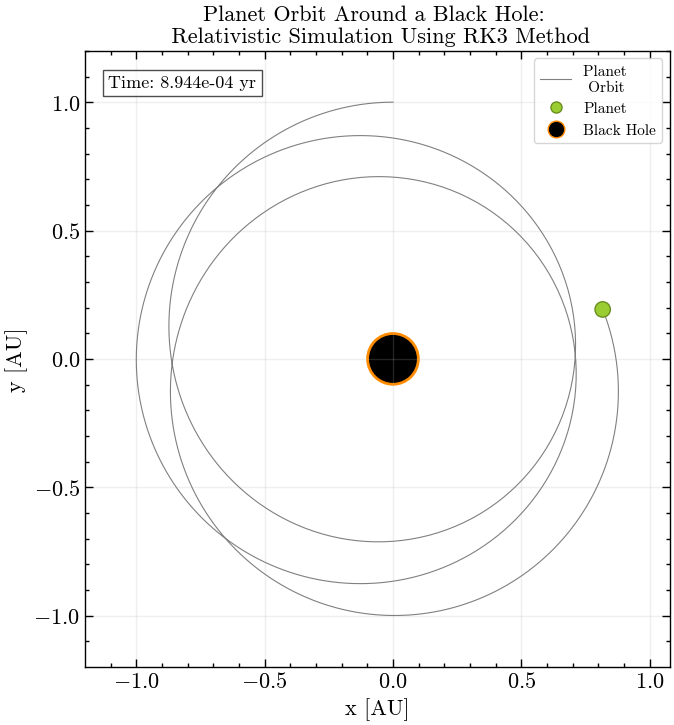

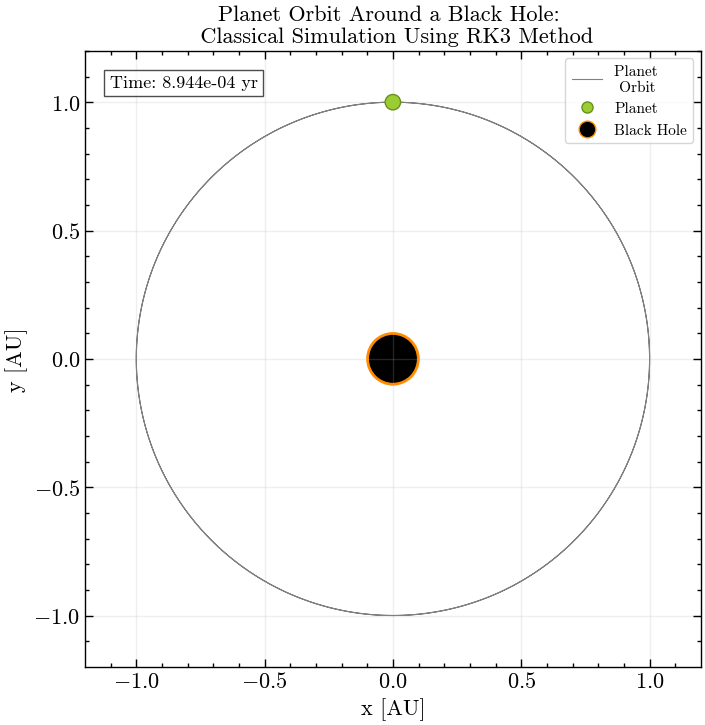

In [27]:
# Use module for ploting the orbital history

plot_orbit_re = AnimateOrbits(orbit_re)
plot_orbit_re.plot_simulation()

plot_orbit_cls = AnimateOrbits(orbit_cls)
plot_orbit_cls.plot_simulation()

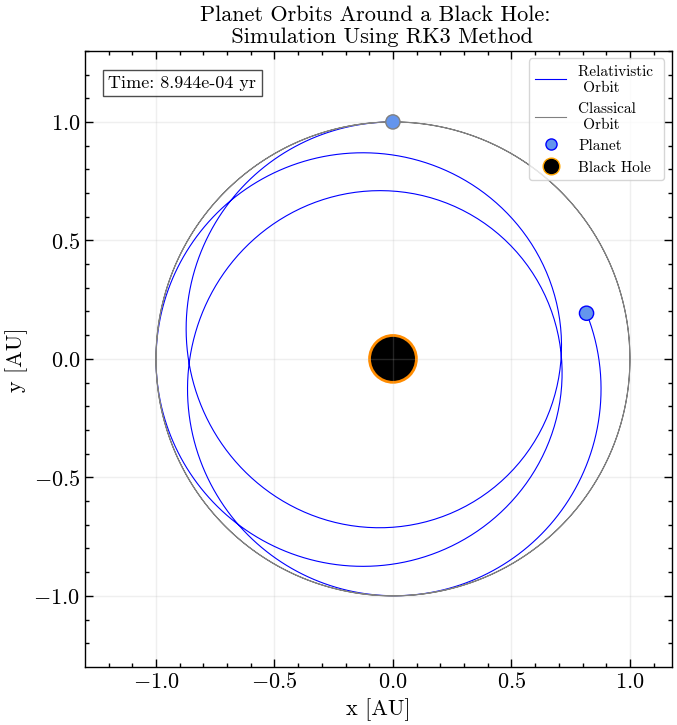

In [28]:
# Ploting the orbits together

# Plot the orbital history together
fig, ax = plt.subplots(figsize = (10, 8))
        
# Planet orbit: Relativistic
orb1, = ax.plot(sol_re[:,0, 0], sol_re[:,0, 1], color = "blue", linestyle = "-", linewidth = 0.8, label="Relativistic \n Orbit")
# Planet orbit: Classical
orb2, = ax.plot(sol_cls[:,0, 0], sol_cls[:,0, 1], color = "gray", linestyle = "-", linewidth = 0.8, label="Classical \n Orbit")

# Black hole
black_hole = plt.Circle((0 ,0), orbit_re.rs, facecolor = "black", edgecolor = "darkorange", linewidth = 2.0, label = "Black Hole")
ax.add_patch(black_hole)
# Planet: Earth
planet = plt.Circle((sol_re[:,0,0][-1], sol_re[:,0,1][-1]), 0.03 , facecolor = "cornflowerblue", edgecolor = "blue", linewidth = 1.0, label = "Earth", zorder = 10)
ax.add_patch(planet)

# Planet: Earth
planet = plt.Circle((sol_cls[:,0,0][-1], sol_cls[:,0,1][-1]), 0.03 , facecolor = "cornflowerblue", edgecolor = "gray", linewidth = 1.0, label = "Earth", zorder = 10)
ax.add_patch(planet)

# Time stamp
ax.text(0.04, 0.96, f"Time: {time_cls[-1]:.3e} yr", ha ='left', va = 'top', fontsize = 13, 
    bbox = dict(facecolor = 'white', alpha = 0.7, edgecolor = 'black'), transform = ax.transAxes) 

ax.set_xlabel("x [AU]")
ax.set_ylabel("y [AU]")
ax.set_title(f"Planet Orbits Around a Black Hole: \n Simulation Using {orbit_cls.name_method} Method")

ax.grid(alpha = 0.2)
ax.set_xlim(np.min(sol_re[:,0,0]) - 0.3, np.max(sol_re[:,0,0]) + 0.3)
ax.set_ylim(np.min(sol_re[:,0,1])-0.3, np.max(sol_re[:,0,1])+0.3)


# Create custom legend 
legend_e = Line2D([0], [0], marker = "o", color = "w", label= "Planet", markerfacecolor= "cornflowerblue",
                   markeredgecolor = "blue", markersize = 8)

legend_bh = Line2D([0], [0], marker = "o", color = "w", label= "Black Hole", markerfacecolor= "black",
                   markeredgecolor = "orange", markersize = 12)

ax.set_aspect('equal')  # Ensures circles stay circular
ax.legend(frameon = True, handles=[orb1, orb2, legend_e, legend_bh], fontsize = 11, loc = 1)

plt.show()

(j) Use the orbital history of both simulations to design a method that quantifies their differences and evaluates the importance of using the relativistic approach for massive objects. Do we need to worry about the relativistic corrections if we replace the black hole with our Sun?

For comparing the differences in orbits trajectories, let's use the distance between orbits as a metric: 

$$
D(t)= \sqrt{(x_c-x_r)^2+(y_c-y_r)^2},
$$

where subindex $c$ stands for classical and subindex $r$ for relativistic.

In [29]:
def metric(xc, yc, xr, yr):
    """
    Compute error metrics between a computed trajectory (xc, yc) and a reference trajectory (xr, yr).

    Inputs:
        xc (array): x-coordinates of the approximate solution.
        yc (array): y-coordinates of the approximate solution.
        xr (array): x-coordinates of the reference solution.
        yr (array): y-coordinates of the reference solution.

    Output:
        diff (array): Point-wise Euclidean distance (error) between the computed and reference positions.
        mean_diff (float): Mean of the point-wise differences, representing average position error.
        max_diff (float): Maximum of the point-wise differences, representing the worst-case deviation.
    """
    # Compute the difference
    diff = np.sqrt((xc - xr)**2 + (yc - yr)**2)

    # Get the average
    mean_diff = np.mean(diff)

    # Maximum difference
    max_diff = np.max(diff)

    return diff, mean_diff, max_diff

In [30]:
diff_1, mean_d1, max_d1 = metric(sol_cls[:,0, 0], sol_cls[:,0, 1], sol_re[:,0, 0], sol_re[:,0, 1])

print(f"The mean difference is: {mean_d1:.3f} AU")
print(f"The max difference is: {max_d1:.3f} AU")

The mean difference is: 1.281 AU
The max difference is: 1.852 AU


To have a point of comparison let's compute the solution for an object that has the mass on the sun.

In [31]:
# Instanciate the classes
orbit_re_sun = RunOrbits(M = 1., e = 0.0, a = 1.0, N = 2.0, n = 500,\
                   simulation = "Relativistic")
orbit_cls_sun = RunOrbits(M = 1., e = 0.0, a = 1.0, N = 2.0, n = 500,\
                   simulation = "Classical")

# Select the method and solve the ODE
time_re_sun, sol_re_sun = orbit_re_sun.solve_ODE("RK3")
time_cls_sun, sol_cls_sun = orbit_cls_sun.solve_ODE("RK3")

# Save both simulations
fname_re = orbit_re_sun.save_solution("01sim_sun")
fname_cls = orbit_cls_sun.save_solution("02sim_sun")

Directory 'outputfolder' already exists.
Solution have been saved in 'outputfolder' as: 01sim_sun-Rel.out
Directory 'outputfolder' already exists.
Solution have been saved in 'outputfolder' as: 02sim_sun-Cla.out


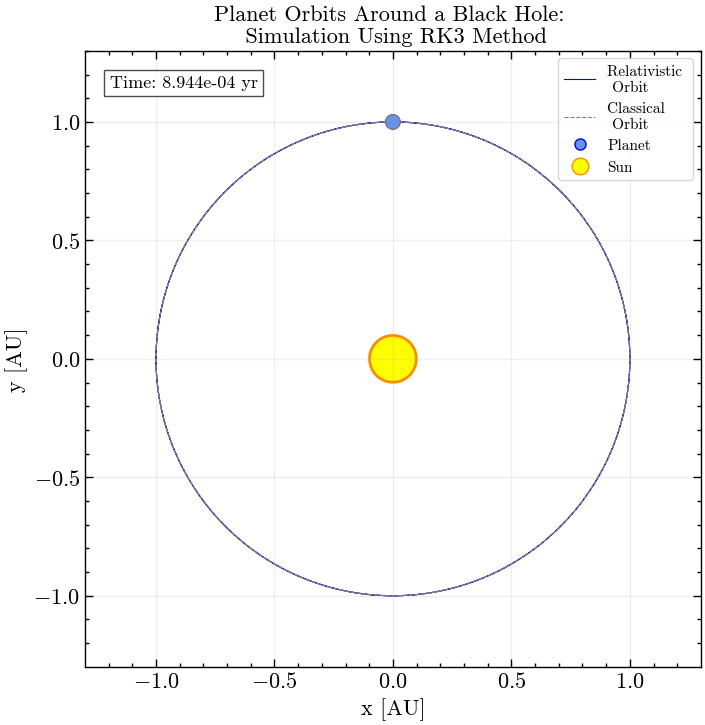

In [32]:
# Ploting the orbits together

# Plot the orbital history together
fig, ax = plt.subplots(figsize = (10, 8))
        
# Planet orbit: Relativistic
orb1, = ax.plot(sol_re_sun[:,0, 0], sol_re_sun[:,0, 1], color = "blue", linestyle = "-", linewidth = 0.8, label="Relativistic \n Orbit")
# Planet orbit: Classical
orb2, = ax.plot(sol_cls_sun[:,0, 0], sol_cls_sun[:,0, 1], color = "gray", linestyle = "--", linewidth = 0.8, label="Classical \n Orbit")

# Sun
sun = plt.Circle((0 ,0), orbit_re.rs, facecolor = "yellow", edgecolor = "darkorange", linewidth = 2.0, label = "Sun")
ax.add_patch(sun)
# Planet: Earth
planet = plt.Circle((sol_re_sun[:,0,0][-1], sol_re_sun[:,0,1][-1]), 0.03 , facecolor = "cornflowerblue", edgecolor = "blue", linewidth = 1.0, label = "Earth", zorder = 10)
ax.add_patch(planet)

# Planet: Earth
planet = plt.Circle((sol_cls_sun[:,0,0][-1], sol_cls_sun[:,0,1][-1]), 0.03 , facecolor = "cornflowerblue", edgecolor = "gray", linewidth = 1.0, label = "Earth", zorder = 10)
ax.add_patch(planet)

# Time stamp
ax.text(0.04, 0.96, f"Time: {time_cls[-1]:.3e} yr", ha ='left', va = 'top', fontsize = 13, 
    bbox = dict(facecolor = 'white', alpha = 0.7, edgecolor = 'black'), transform = ax.transAxes) 

ax.set_xlabel("x [AU]")
ax.set_ylabel("y [AU]")
ax.set_title(f"Planet Orbits Around a Black Hole: \n Simulation Using {orbit_cls.name_method} Method")

ax.grid(alpha = 0.2)
ax.set_xlim(np.min(sol_re_sun[:,0,0]) - 0.3, np.max(sol_re_sun[:,0,0]) + 0.3)
ax.set_ylim(np.min(sol_re_sun[:,0,1])-0.3, np.max(sol_re_sun[:,0,1])+0.3)


# Create custom legend 
legend_e = Line2D([0], [0], marker = "o", color = "w", label= "Planet", markerfacecolor= "cornflowerblue",
                   markeredgecolor = "blue", markersize = 8)

legend_bh = Line2D([0], [0], marker = "o", color = "w", label= "Sun", markerfacecolor= "yellow",
                   markeredgecolor = "darkorange", markersize = 12)

ax.set_aspect('equal')  # Ensures circles stay circular
ax.legend(frameon = True, handles=[orb1, orb2, legend_e, legend_bh], fontsize = 11, loc = 1)

plt.show()

Using the method created before let's quantify the differences.

In [33]:
diff_2, mean_d2, max_d2 = metric(sol_cls_sun[:,0, 0], sol_cls_sun[:,0, 1], sol_re_sun[:,0, 0], sol_re_sun[:,0, 1])

print(f"The mean difference is: {mean_d2:.3e} AU")
print(f"The max difference is: {max_d2:.3e} AU")

The mean difference is: 3.760e-07 AU
The max difference is: 7.453e-07 AU


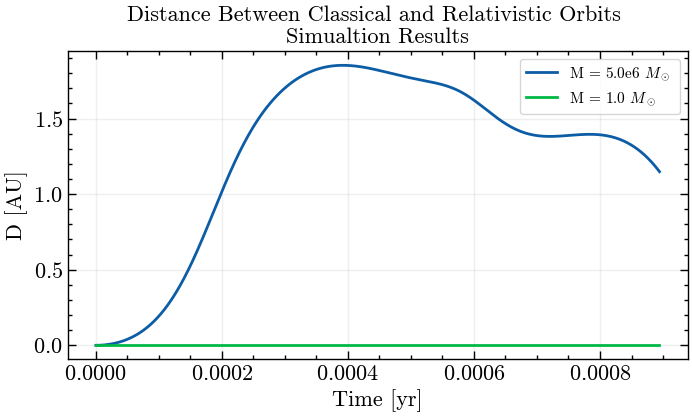

In [34]:
plt.figure(figsize=(8, 4))

plt.plot(time_cls, diff_1, label = r"M = 5.0e6 $M_\odot$ ")
plt.plot(time_cls, diff_2, label = r"M = 1.0 $M_\odot$")

plt.xlabel("Time [yr]")
plt.ylabel("D [AU]")
plt.title("Distance Between Classical and Relativistic Orbits \n" \
            "Simualtion Results")

plt.grid(alpha = 0.2)
plt.legend(frameon = True, fontsize = 11)

plt.show()

It was found that the mean difference between classical and relativistic orbits is $1.281$ AU for the black hole case. However, in the simulation considering a solar mass, the difference is only $3.760 \times 10^{-7}$ AU. Therefore, relativistic corrections are crucial for black holes but likely negligible for objects like the Sun, which have similar mass and orbits. In the figure above, a graphical comparison of the differences between the orbits is shown more clearly.

### The role of eccentricity (3 points):

(k) Use your module/script to run and show three relativistic simulations for objects with different eccentricities, $e$, and assuming the same $M$, $a$, $N$ as above. It may be helpful to compare the orbital history for all values of $e$ in a single plot throughout time.

| Object           | Eccentricity ($e$) | Integration Method |
|------------------|--------------------|--------------------|
| Earth            | 0.01671            | Trapezoidal        |
| Pluto            | 0.25               | Trapezoidal        |
| 7092 Cadmus      | 0.70               | Trapezoidal        |

(l) Describe the differences in the orbits of the above objects. What happens to objects with high eccentricities?

In [35]:
# Instanciate the classes
orbit_e = RunOrbits(M = 5.e6, e = 0.01671, a = 1.5, N = 2.0, n = 500,\
                   simulation = "Relativistic")
orbit_p = RunOrbits(M = 5.e6, e = 0.25, a = 1.5, N = 2.0, n = 500,\
                   simulation = "Relativistic")
orbit_cad = RunOrbits(M = 5.e6, e = 0.70, a = 1.5, N = 2.0, n = 500,\
                   simulation = "Relativistic")

# Select the method and solve the ODE
time, sol_e = orbit_e.solve_ODE("Trapezoidal")
_, sol_p = orbit_p.solve_ODE("Trapezoidal")
_, sol_cad = orbit_cad.solve_ODE("Trapezoidal")

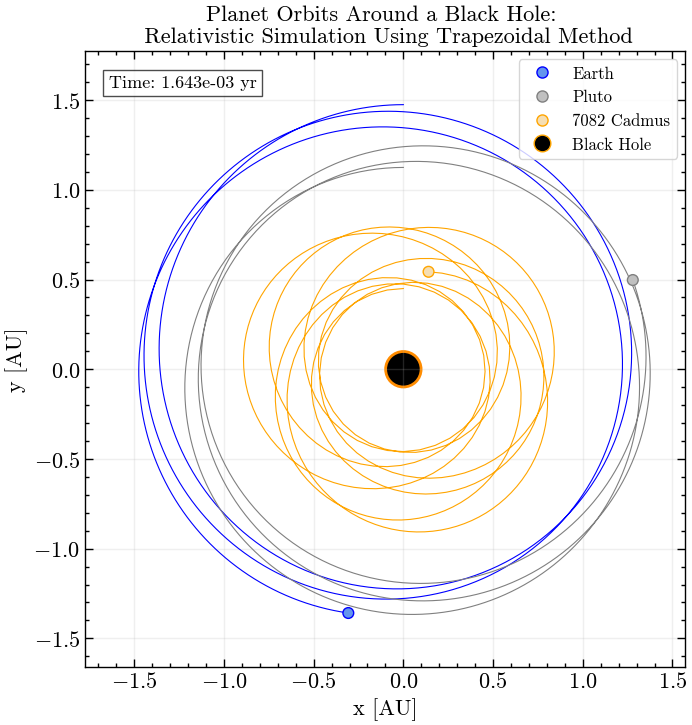

In [36]:
# Plot the orbital history together
fig, ax = plt.subplots(figsize = (10, 8))
        
# Planet orbit: Earth
ax.plot(sol_e[:,0, 0], sol_e[:,0, 1], color = "blue", linestyle = "-", linewidth = 0.8, label="")
# Planet orbit: Pluto
ax.plot(sol_p[:,0, 0], sol_p[:,0, 1], color = "gray", linestyle = "-", linewidth = 0.8, label="")
# Planet orbit: 7082 Cadmus
ax.plot(sol_cad[:,0, 0], sol_cad[:,0, 1], color = "orange", linestyle = "-", linewidth = 0.8, label="")
# Black hole
black_hole = plt.Circle((0 ,0), orbit_e.rs, facecolor = "black", edgecolor = "darkorange", linewidth = 2.0, label = "Black Hole")
ax.add_patch(black_hole)
# Planet: Earth
planet = plt.Circle((sol_e[:,0,0][-1], sol_e[:,0,1][-1]), 0.03 , facecolor = "cornflowerblue", edgecolor = "blue", linewidth = 1.0, label = "Earth", zorder = 10)
ax.add_patch(planet)
# Planet: Pluto
planet = plt.Circle((sol_p[:,0,0][-1], sol_p[:,0,1][-1]), 0.03 , facecolor = "silver", edgecolor = "gray", linewidth = 1.0, label = "Pluto", zorder = 10)
ax.add_patch(planet)
# Planet: 7082 Cadmus
planet = plt.Circle((sol_cad[:,0,0][-1], sol_cad[:,0,1][-1]), 0.03 , facecolor = "wheat", edgecolor = "orange", linewidth = 1.0, label = "7082 Cadmus", zorder = 10)
ax.add_patch(planet)
# Time stamp
ax.text(0.04, 0.96, f"Time: {time[-1]:.3e} yr", ha ='left', va = 'top', fontsize = 13, 
    bbox = dict(facecolor = 'white', alpha = 0.7, edgecolor = 'black'), transform = ax.transAxes) 

ax.set_xlabel("x [AU]")
ax.set_ylabel("y [AU]")
ax.set_title(f"Planet Orbits Around a Black Hole: \n {orbit_e.simulation_type} Simulation Using {orbit_e.name_method} Method")

ax.grid(alpha = 0.2)
ax.set_xlim(np.min(sol_e[:,0,0]) - 0.3, np.max(sol_e[:,0,0]) + 0.3)
ax.set_ylim(np.min(sol_e[:,0,1])-0.3, np.max(sol_e[:,0,1])+0.3)


# Create custom legend 
legend_e = Line2D([0], [0], marker = "o", color = "w", label= "Earth", markerfacecolor= "cornflowerblue",
                   markeredgecolor = "blue", markersize = 8)
legend_p = Line2D([0], [0], marker = "o", color = "w", label= "Pluto", markerfacecolor= "silver",
                   markeredgecolor = "gray", markersize = 8)
legend_cad = Line2D([0], [0], marker = "o", color = "w", label= "7082 Cadmus", markerfacecolor= "wheat",
                   markeredgecolor = "orange", markersize = 8)
legend_bh = Line2D([0], [0], marker = "o", color = "w", label= "Black Hole", markerfacecolor= "black",
                   markeredgecolor = "orange", markersize = 12)

ax.set_aspect('equal')  # Ensures circles stay circular
ax.legend(frameon = True, handles=[legend_e, legend_p, legend_cad, legend_bh], fontsize = 12, loc = 1)

plt.show()
    

I just slightly increased the semi-major axis to better visualize the orbits. The eccentricity makes the orbits more elongated,the higher the eccentricity, the more oval-shaped the orbits become.


### Numerical convergence (3 points):

(m) Use your script to generate additional simulations with the same initial conditions as before, but only for $e=0.01671$ (Earth's eccentricity) with RK3, the Trapezoidal method and the higher-order SciPy integrator. Compare the orbital history for all methods in a single plot throughout time.

In [37]:
# Instanciate a class for computing the orbits 
orbit_comp = RunOrbits(M = 5.e6, e = 0.01671, a = 1.0, N = 2.0, n = 600,\
                   simulation = "Relativistic")

# Select the method and solve the ODE
time_tra, sol_tra = orbit_comp.solve_ODE("Trapezoidal")
_, sol_RK3 = orbit_comp.solve_ODE("RK3")
_, sol_DOP853 = orbit_comp.solve_ODE("DOP853")

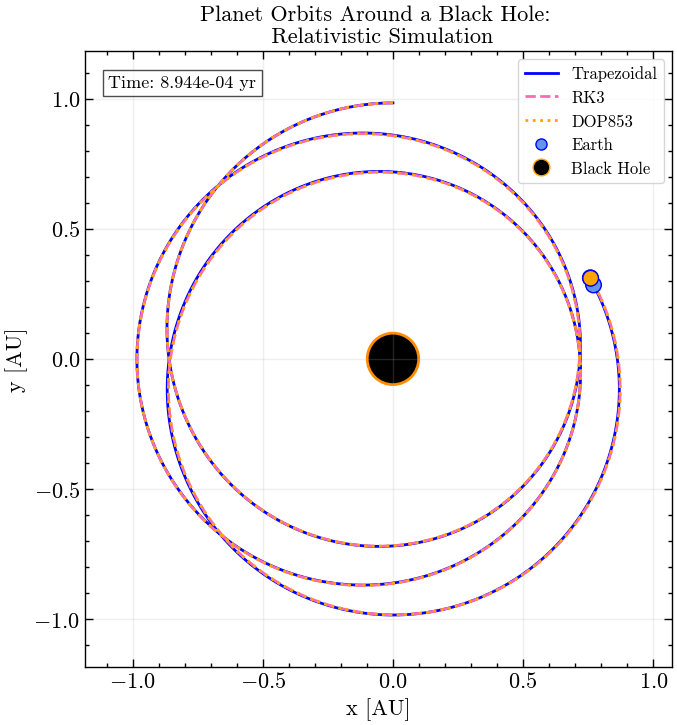

In [38]:
# Plot the orbital history together
fig, ax = plt.subplots(figsize = (10, 8))
        
# Planet orbit: Trapezoidal
orb_tra, = ax.plot(sol_tra[:,0, 0], sol_tra[:,0, 1], color = "blue", linestyle = "-", label="Trapezoidal")
# Planet orbit: RK3
orb_RK3, = ax.plot(sol_RK3[:,0, 0], sol_RK3[:,0, 1], color = "hotpink", linestyle = "--", label="RK3")
# Planet orbit: DOP853
orb_DOP583, = ax.plot(sol_DOP853[:,0, 0], sol_DOP853[:,0, 1], color = "orange", linestyle = ":", label="DOP853")
# Black hole
black_hole = plt.Circle((0 ,0), orbit_comp.rs, facecolor = "black", edgecolor = "darkorange", linewidth = 2.0, label = "Black Hole")
ax.add_patch(black_hole)
# Planet: Earth
planet = plt.Circle((sol_tra[:,0,0][-1], sol_tra[:,0,1][-1]), 0.03 , facecolor = "cornflowerblue", edgecolor = "blue", linewidth = 1.0, zorder = 10)
ax.add_patch(planet)
# Planet: Earth
planet = plt.Circle((sol_RK3[:,0,0][-1], sol_RK3[:,0,1][-1]), 0.03 , facecolor = "hotpink", edgecolor = "blue", linewidth = 1.0, zorder = 10)
ax.add_patch(planet)
# Planet: EarthDOP853
planet = plt.Circle((sol_DOP853[:,0,0][-1], sol_DOP853[:,0,1][-1]), 0.03 , facecolor = "orange", edgecolor = "blue", linewidth = 1.0, zorder = 10)
ax.add_patch(planet)
# Time stamp
ax.text(0.04, 0.96, f"Time: {time_tra[-1]:.3e} yr", ha ='left', va = 'top', fontsize = 13, 
    bbox = dict(facecolor = 'white', alpha = 0.7, edgecolor = 'black'), transform = ax.transAxes) 

ax.set_xlabel("x [AU]")
ax.set_ylabel("y [AU]")
ax.set_title(f"Planet Orbits Around a Black Hole: \n {orbit_comp.simulation_type} Simulation")

ax.grid(alpha = 0.2)
ax.set_xlim(np.min(sol_RK3[:,0,0]) - 0.2, np.max(sol_RK3[:,0,0]) + 0.2)
ax.set_ylim(np.min(sol_RK3[:,0,1])-0.2, np.max(sol_RK3[:,0,1]) + 0.2)


# Create custom legend 
legend_e = Line2D([0], [0], marker = "o", color = "w", label= "Earth", markerfacecolor= "cornflowerblue",
                   markeredgecolor = "blue", markersize = 8)
legend_bh = Line2D([0], [0], marker = "o", color = "w", label= "Black Hole", markerfacecolor= "black",
                   markeredgecolor = "orange", markersize = 12)

ax.set_aspect('equal')  # Ensures circles stay circular
ax.legend(frameon = True, handles=[orb_tra, orb_RK3, orb_DOP583, legend_e, legend_bh], fontsize = 12, loc = 1)

plt.show()
    

As seen, the three methods gave very similar results, although there are still slight differences between them. The point of reference should be the DOP853 method, as it is the higher-order method. It is also observed that, depending on the accuracy of each method, the final position of the planet within the period varies noticeably. The final position using the SciPy integrator is slightly ahead of the other two.

(n) Measure convergence of the simulations with RK3 and Trapezoidal method for $e=0.01671$ by integrating at a number of different time steps. To analyse convergence, you need to define some measure for the error with respect to the higher order method, and then plot it against different time steps for both methods. Thus, you may add additional functions for this to your code in **orbits.py**. 

I am going to use interpolation for adjusting the shape arrays of the reference solution to the aproximate solution. The error will ve computed as the mean of distance between the two solutions over the number of time steps: 

$$
\langle D(t)/n \rangle,
$$

where $D(t)$ is the distance over time and n the number of time steps.

In [39]:
# Define the time steps that will be used
n_min = 100
n_max = 1000

# Compute exact solution (reference)

# Instanciate a class for computing the orbits 
orbit_comp = RunOrbits(M = 5.e6, e = 0.01671, a = 1.0, N = 2.0, n = n_max,\
                   simulation = "Relativistic")

# Select the method and solve the ODE
time_ref, sol_ref = orbit_re.solve_ODE("DOP853")

In [40]:
# Create a step array for interating
n_arr = np.arange(n_min, n_max, 5)

# Empty list to save error
error_tra = []
error_RK3 = []

for n_i in n_arr:
    # Instanciate a class for computing the orbits 
    orbit_err = RunOrbits(M = 5.e6, e = 0.01671, a = 1.0, N = 2.0, n = n_i,\
                    simulation = "Relativistic")

    # Select the method and solve the ODE
    time_err, sol_tra_err = orbit_err.solve_ODE("Trapezoidal")
    _, sol_RK3_err = orbit_err.solve_ODE("RK3")

    # Compute the error
    err_tra_i = RunOrbits.error_estimate(time_err, sol_tra_err, time_ref, sol_ref) # Trapezoidal method
    err_RK3_i = RunOrbits.error_estimate(time_err, sol_RK3_err, time_ref, sol_ref) # RK3 method

    # Append the results 
    error_tra.append(err_tra_i)
    error_RK3.append(err_RK3_i)

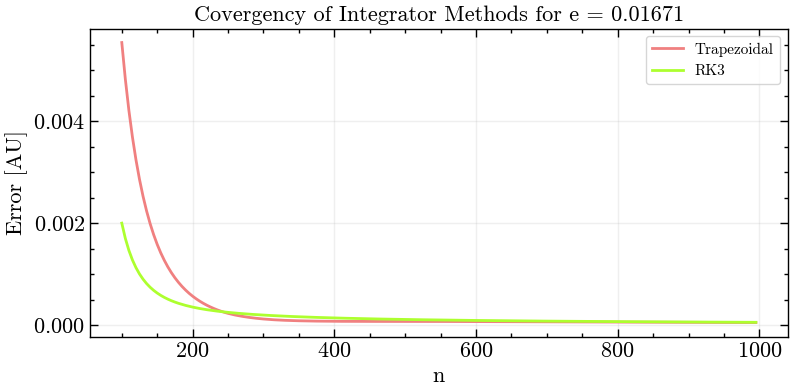

In [41]:
# Plot the solutions 

plt.figure(figsize = (9, 4))

plt.plot(n_arr, error_tra, color = "lightcoral", label = "Trapezoidal")
plt.plot(n_arr, error_RK3, color = "greenyellow", label = "RK3")

plt.xlabel("n")
plt.ylabel("Error [AU]")
plt.title(f"Covergency of Integrator Methods for e = {orbit_err.e}")

plt.grid(alpha = 0.2)
plt.legend(frameon = True, fontsize = 11)

plt.show()

Both methods reach good convergence around the 500-step point. However, it is observed that the trapezoidal integrator converges first, requiring fewer steps. Additionally, the RK3 method is much more accurate at the beginning when only 100 steps are used.

**Note:** Please include all your simulation outputs in the **outputfolder** for a reference.


### Exam submission:

- Send your code **in a single .tar ball file via email** to wbanda@yachaytech.edu.ec by the deadline.